In [4]:


import pandas as pd

df = pd.read_csv("survey_results.csv")
df.head(4)


,respondent_id,age,gender,zone,occupation,income_levels,consume_frequency(weekly),current_brand,preferable_consumption_size,awareness_of_other_brands,reasons_for_choosing_brands,flavor_preference,purchase_channel,packaging_preference,health_concerns,typical_consumption_situations,price_range
0,R00001,30,M,Urban,Working Professional,<10L,3-4 times,Newcomer,Medium (500 ml),0 to 1,Price,Traditional,Online,Simple,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",100-150
1,R00002,46,F,Metro,Working Professional,> 35L,5-7 times,Established,Medium (500 ml),2 to 4,Quality,Exotic,Retail Store,Premium,Medium (Moderately health-conscious),Social (eg. Parties),200-250
2,R00003,41,F,Rural,Working Professional,> 35L,3-4 times,Newcomer,Medium (500 ml),2 to 4,Availability,Traditional,Retail Store,Premium,Medium (Moderately health-conscious),"Active (eg. Sports, gym)",200-250
3,R00004,33,F,Urban,Working Professional,16L - 25L,5-7 times,Newcomer,Medium (500 ml),0 to 1,Brand Reputation,Exotic,Online,Eco-Friendly,Low (Not very concerned),"Active (eg. Sports, gym)",150-200


Step-1 Remove Duplicates:

In [5]:







duplicate_count = df.duplicated().sum()
print("number of duplicated rows:", duplicate_count)

df[df.duplicated()]

df = df.drop_duplicates()

print("After removing duplicates:",df.duplicated().sum())
print("Final dataset shape:",df.shape)

number of duplicated rows: 10
After removing duplicates: 0
Final dataset shape: (30000, 17)


Step -2 Outlier Dectection in age:

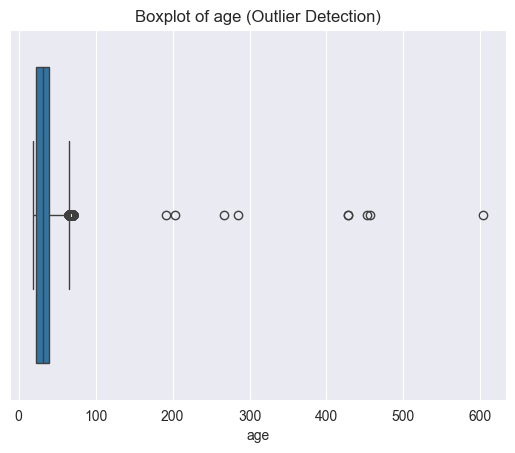

Lower Bound: -2.5
Upper Bound: 65.5
Number of outlier detected: 493
Shape before removing outliers: (30000, 17)
Shape after removing outliers: (29507, 17)


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df['age'])
plt.title('Boxplot of age (Outlier Detection)')
plt.show()

Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Number of outlier detected:", outliers.shape[0])

df_clean = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print("Shape before removing outliers:", df.shape)
print("Shape after removing outliers:", df_clean.shape)



In [7]:

missing_summary =df.isnull().sum()
print("Missing values before handling:", missing_summary)

df['income_levels'] = df['income_levels'].fillna('Not Reported')

consume_mode = df['consume_frequency(weekly)'].mode()[0]
purchase_mode = df['purchase_channel'].mode()[0]

df['consume_frequency(weekly)'] =df['consume_frequency(weekly)'].fillna(consume_mode)
df['purchase_channel'] = df['purchase_channel'].fillna(purchase_mode)

print("Missing values after handling:",df.isnull().sum())

Missing values before handling: respondent_id                        0
age                                  0
gender                               0
zone                                 0
occupation                           0
income_levels                     8061
consume_frequency(weekly)            8
current_brand                        0
preferable_consumption_size          0
awareness_of_other_brands            0
reasons_for_choosing_brands          0
flavor_preference                    0
purchase_channel                    10
packaging_preference                 0
health_concerns                      0
typical_consumption_situations       0
price_range                          0
dtype: int64
Missing values after handling: respondent_id                     0
age                               0
gender                            0
zone                              0
occupation                        0
income_levels                     0
consume_frequency(weekly)         0
current_b

In [8]:


print("Unique zone values:", df['zone'].unique())
print("Unique Current Brand values:", df['current_brand'].unique())

df['zone'] = df['zone'].astype(str).str.strip().str.lower()
df['current_brand'] = df['current_brand'].astype(str).str.strip().str.lower()

zone_corrections = {
    'Urban': 'urban',
    'Metro': 'metro',
    'Rural': 'rural',
    'Semi-Urban': 'semi-urban',
    'metor': 'metro',
    'urbna': 'urban',
}

brand_corrections = {
    'Newcomer': 'newcomer',
    'Established': 'established',
    'newcomer': 'newcomer',
    'establishd': 'established',
}

df['zone'] = df['zone'].replace(zone_corrections)
df['current_brand'] = df['current_brand'].replace(brand_corrections)

print("Cleaned Zone Values:", df['zone'].unique())
print("Cleaned current brand values:", df['current_brand'].unique())

Unique zone values: ['Urban' 'Metro' 'Rural' 'Semi-Urban' 'Metor' 'urbna']
Unique Current Brand values: ['Newcomer' 'Established' 'newcomer' 'Establishd']
Cleaned Zone Values: ['urban' 'metro' 'rural' 'semi-urban']
Cleaned current brand values: ['newcomer' 'established']


In [9]:
bins = [17,25,35,45,55,70]
labels = ['18-25','26-35','36-45','46-55','56-70',]

df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

print(df['age_group'].value_counts(dropna=False))

df = df.drop(columns=['age'])

print(df.head())



age_group
18-25    10468
26-35     9093
36-45     5972
46-55     2966
56-70     1492
NaN          9
Name: count, dtype: int64
  respondent_id gender   zone            occupation income_levels  \
0        R00001      M  urban  Working Professional          <10L   
1        R00002      F  metro  Working Professional         > 35L   
2        R00003      F  rural  Working Professional         > 35L   
3        R00004      F  urban  Working Professional     16L - 25L   
4        R00005      M  metro               Student  Not Reported   

  consume_frequency(weekly) current_brand preferable_consumption_size  \
0                 3-4 times      newcomer             Medium (500 ml)   
1                 5-7 times   established             Medium (500 ml)   
2                 3-4 times      newcomer             Medium (500 ml)   
3                 5-7 times      newcomer             Medium (500 ml)   
4                 3-4 times   established             Medium (500 ml)   

  awareness_of_other

In [10]:
# Clean the 'consume_frequency(weekly)' column
df['consume_frequency(weekly)'] = (
    df['consume_frequency(weekly)']
    .astype(str)
    .str.strip()               # remove leading/trailing spaces
    .str.lower()               # make lowercase
    .str.replace('–', '-', regex=False)   # replace en dash with normal dash
    .str.replace('—', '-', regex=False)   # replace em dash if any
    .str.replace('  ', ' ', regex=False)  # fix double spaces
)

# Clean the 'awareness_of_other_brands' column
df['awareness_of_other_brands'] = (
    df['awareness_of_other_brands']
    .astype(str)
    .str.strip()
    .str.lower()
    .str.replace(' ', '', regex=False)  # remove spaces if values like '0 to 1'
)

freq_mapping = {
    "0-2 times": 1,
    "3-4 times": 2,
    "5-7 times": 3
}

awareness_mapping = {
    "0to1": 1,
    "2to4": 2,
    "above4": 3   # notice: no space here
}

df['frequency_score'] = df['consume_frequency(weekly)'].map(freq_mapping)
df['awareness_score'] = df['awareness_of_other_brands'].map(awareness_mapping)




df['cf_ab_score'] = df['frequency_score'] / (df['awareness_score'] + df['frequency_score'])
df['cf_ab_score'] = df['cf_ab_score'].round(2)

print(df[['consume_frequency(weekly)', 'awareness_of_other_brands', 'cf_ab_score']].head())
max_score = df['cf_ab_score'].max()
print(round(max_score, 2))





  consume_frequency(weekly) awareness_of_other_brands  cf_ab_score
0                 3-4 times                      0to1         0.67
1                 5-7 times                      2to4         0.60
2                 3-4 times                      2to4         0.50
3                 5-7 times                      0to1         0.75
4                 3-4 times                      0to1         0.67
0.75


In [11]:
df['income_levels'] = df['income_levels'].str.strip()          # remove leading/trailing spaces
df['income_levels'] = df['income_levels'].str.replace(' ', '') # remove all spaces
df['income_levels'] = df['income_levels'].str.lower()          # make lowercase for consistency




zone_mapping ={
    "urban": 3,
    "metro": 4,
    "rural": 1,
    "semi-urban": 2
}

income_mapping = {
    "<10l": 1,
    "10l-15l": 2,
    "16l-25l": 3,
    "26l-35l": 4,
    ">35l": 5,
    "notreported": 0
}

df['zone_score'] = df['zone'].map(zone_mapping)
df['income_score'] = df['income_levels'].map(income_mapping)

df['zas_score'] = df['zone_score'] * df['income_score']

print(df[['zone', 'income_levels', 'zas_score']].head())
print("unique values :",df['zas_score'].unique())















    zone income_levels  zas_score
0  urban          <10l          3
1  metro          >35l         20
2  rural          >35l          5
3  urban       16l-25l          9
4  metro   notreported          0
unique values : [ 3 20  5  9  0  6 12  2  4  8 15 16  1 10]


In [12]:



# Count nulls in 'age_group'
null_count = df['age_group'].isnull().sum()
print("Null values in age_group:", null_count)


# Remove rows with nulls in 'age_group'
df = df.dropna(subset=['age_group'])
print("After dropping nulls:", df.shape)


occupation_col = df[~((df['occupation'] == 'Student') & (df['age_group'] == '56-70'))]
print("rows :", occupation_col.shape)
pd.crosstab(df['age_group'], df['occupation'])








Null values in age_group: 9
After dropping nulls: (29991, 23)
rows : (29956, 23)


occupation,Entrepreneur,Retired,Student,Working Professional
age_group,,,,
18-25,535,0,7328,2605
26-35,1826,0,697,6570
36-45,1619,0,0,4353
46-55,799,0,0,2167
56-70,221,1130,35,106


In [13]:


valid_combinations = {
    '18-25': ['Student', 'Working Professional', 'Entrepreneur'],
    '26-35': ['Working Professional', 'Entrepreneur', 'Student'],
    '36-45': ['Working Professional', 'Entrepreneur'],
    '46-55': ['Working Professional', 'Entrepreneur'],
    '56-70': ['Retired', 'Working Professional', 'Entrepreneur']
}
df_clean = df[
    df.apply(lambda row: row['occupation'] in valid_combinations.get(row['age_group'], []), axis=1)
].copy()
df_clean['bsi'] = df_clean.apply(
    lambda row: 1 if (
        row['current_brand'].strip().lower() != 'established' and
        row['reasons_for_choosing_brands'].strip().lower() in ['price', 'quality']
    ) else 0,
    axis=1
)
print("After removing logical outliers:", len(df_clean))
print(df_clean['bsi'].value_counts())




After removing logical outliers: 29956
bsi
0    20796
1     9160
Name: count, dtype: int64


In [14]:
categorical_columns = [
    'respondent_id', 'gender', 'zone', 'occupation', 'income_levels', 'consume_frequency(weekly)', 'awareness_of_other_brands', 'current_brand', 'preferable_consumption_size', 'reasons_for_choosing_brands', 'flavor_preference', 'purchase_channel', 'packaging_preference', 'health_concerns', 'typical_consumption_situations', 'price_range'
]

df[categorical_columns] = df[categorical_columns].astype('category')

Modeling Instructions:-


Step 1 Prepare Features and Target Variables:-

In [15]:
y = df_clean['price_range']

x = df_clean.drop(columns=['price_range', 'respondent_id'])

print("Feature shape(x):", x.shape)
print("Target shape(y):", y.shape)



Feature shape(x): (29956, 22)
Target shape(y): (29956,)


Step 2 Data Splitting:-

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42,
    stratify=y
)

print("Training set shape:", x_train.shape, y_train.shape)
print("Test set shape:", x_test.shape, y_test.shape)

Training set shape: (22467, 22) (22467,)
Test set shape: (7489, 22) (7489,)


Step 3 Feature Encoding:-

In [17]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df_clean.copy()

label_cols = [
    'age_group',
    'income_levels',
    'health_concerns',
    'consume_frequency(weekly)',
    'preferable_consumption_size'
]

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

df_encoded = pd.get_dummies(
    df_encoded,
    columns=[
        'gender',
        'occupation',
        'zone', 'current_brand', 'awareness_of_other_brands',
        'flavor_preference',
        'purchase_channel', 'packaging_preference',
        'typical_consumption_situations'
    ],
    drop_first=True
)

target_encoder = LabelEncoder()
df_encoded['price_range'] = target_encoder.fit_transform(df_encoded['price_range'])

print("Encoding complated succesfully!")

Encoding complated succesfully!


Step 4 Model selection:-

In [18]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

x =df_encoded.drop(columns=['price_range', 'respondent_id'])
y = df_encoded['price_range']


x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42,
)
# Convert all categorical columns to numeric codes
for col in x_train.select_dtypes(['category']).columns:
    x_train[col] = x_train[col].cat.codes
    x_test[col] = x_test[col].cat.codes
le = LabelEncoder()
for col in x_train.select_dtypes(include='object').columns:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])

print(x_train.dtypes.value_counts())
print(x_train.select_dtypes(include='object').columns
)

models = {
    'LogisticRegression': LogisticRegression(max_iter=10000),
    'GaussianNB': GaussianNB(),
    'Support Vector Machine' : SVC(),
    'RandomForestClassifier': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'LightGBM': LGBMClassifier(random_state=42),

}

results = {}

for name,model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy:}")
    print(classification_report(y_test, y_pred,  output_dict=True))



print("\n Model Comaparison Results:")
for name, accuracy in results.items():
    print(f"{name}: {accuracy:}")

bool       16
int32       6
int64       6
float64     1
Name: count, dtype: int64
Index([], dtype='object')
LogisticRegression Accuracy: 0.8087862197890239
{'0': {'precision': 0.7463439233484619, 'recall': 0.7668393782383419, 'f1-score': 0.7564528494761052, 'support': 1930.0}, '1': {'precision': 0.7633318642573821, 'recall': 0.7791273054430949, 'f1-score': 0.7711487088156723, 'support': 2223.0}, '2': {'precision': 0.9073068893528183, 'recall': 0.894238683127572, 'f1-score': 0.9007253886010362, 'support': 2430.0}, '3': {'precision': 0.7980997624703088, 'recall': 0.7417218543046358, 'f1-score': 0.7688787185354691, 'support': 906.0}, 'accuracy': 0.8087862197890239, 'macro avg': {'precision': 0.8037706098572428, 'recall': 0.7954818052784112, 'f1-score': 0.7993014163570706, 'support': 7489.0}, 'weighted avg': {'precision': 0.8098764364043453, 'recall': 0.8087862197890239, 'f1-score': 0.809131311587632, 'support': 7489.0}}
GaussianNB Accuracy: 0.575644278274803
{'0': {'precision': 0.55321782

C:\Users\heman\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [13:04:14] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.9240218987848845
{'0': {'precision': 0.9167105956773853, 'recall': 0.9010362694300518, 'f1-score': 0.9088058531486805, 'support': 1930.0}, '1': {'precision': 0.8964301454385192, 'recall': 0.9149797570850202, 'f1-score': 0.9056099732858415, 'support': 2223.0}, '2': {'precision': 0.9577464788732394, 'recall': 0.951440329218107, 'f1-score': 0.9545829892650702, 'support': 2430.0}, '3': {'precision': 0.9185918591859186, 'recall': 0.9216335540838853, 'f1-score': 0.9201101928374655, 'support': 906.0}, 'accuracy': 0.9240218987848845, 'macro avg': {'precision': 0.9223697697937656, 'recall': 0.9222724774542661, 'f1-score': 0.9222772521342644, 'support': 7489.0}, 'weighted avg': {'precision': 0.9242333864403253, 'recall': 0.9240218987848845, 'f1-score': 0.9240783503560213, 'support': 7489.0}}
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004511 seconds.
You

Step 5 Performance Evaluation:-

In [19]:
results = {}

for name,model in models.items():
    print(f"\n{'='*60}")
    print(f"Model : {name}")
    print('='*60)

    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy Score: {accuracy:}\n")

    cr =  classification_report(y_test, y_pred, output_dict=True)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))



    results [name] = {
        'accuracy': accuracy,
        'classification_report': cr
    }




print("\n\nModel Comparison Summary:")
for name,accuracy in results.items() :
    print(f"{name}: Accuracy = {accuracy:}")





Model : LogisticRegression
Accuracy Score: 0.8087862197890239

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1930
           1       0.76      0.78      0.77      2223
           2       0.91      0.89      0.90      2430
           3       0.80      0.74      0.77       906

    accuracy                           0.81      7489
   macro avg       0.80      0.80      0.80      7489
weighted avg       0.81      0.81      0.81      7489


Model : GaussianNB
Accuracy Score: 0.575644278274803

Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.23      0.33      1930
           1       0.54      0.37      0.44      2223
           2       0.66      0.93      0.77      2430
           3       0.45      0.88      0.60       906

    accuracy                           0.58      7489
   macro avg       0.55      0.60      0.53      7489
weighted avg       0

Step 6 Model Comparison:-


Best Performing Model: XGBoost
Accuracy Score: 0.9240


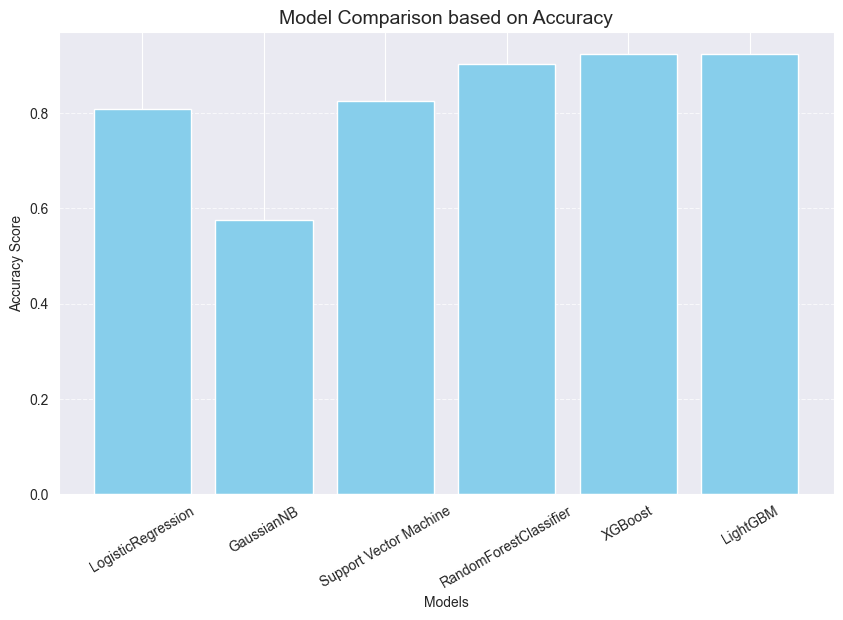

In [20]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

best_model_name = max(results, key=lambda name: results[name]['accuracy'])
best_accuracy = results[best_model_name]['accuracy']

print("\n" + "="*60)
print(f"Best Performing Model: {best_model_name}")
print(f"Accuracy Score: {best_accuracy:.4f}")
print("="*60)

model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]

plt.figure(figsize=(10,6))
plt.bar(model_names, accuracies, color='skyblue')
plt.title("Model Comparison based on Accuracy", fontsize =14)
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--',alpha=0.7)
plt.show()

In [21]:
import mlflow
import mlflow.sklearn
import warnings
warnings.filterwarnings('ignore')

In [23]:
mlflow.set_experiment("Price Prediction")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")


for model_name, model in models.items():


    y_pred = model.predict(x_test)
    report = classification_report(y_test, y_pred,output_dict=True)






    with mlflow.start_run(run_name=model_name):

        mlflow.log_metrics({
            'accuracy': report['accuracy'],
            'recall_class_1': report['1']['recall'],
            'recall_class_0': report['0']['recall'],
            'f1_score_macro': report['macro avg']['f1-score']
            })

        mlflow.sklearn.log_model(model, name="model")



        print(f"✅ Logged {model_name} successfully!")

2025/11/07 13:08:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged LogisticRegression successfully!
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/390495805690880024/runs/b1d4859818db4e809b9e6d9ddb60e14e
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/390495805690880024


2025/11/07 13:08:24 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged GaussianNB successfully!
🏃 View run GaussianNB at: http://127.0.0.1:5000/#/experiments/390495805690880024/runs/b4de352a69cd45d5b347855fcd9e3659
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/390495805690880024


2025/11/07 13:09:03 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged Support Vector Machine successfully!
🏃 View run Support Vector Machine at: http://127.0.0.1:5000/#/experiments/390495805690880024/runs/d56cc6b307254719b67be997eec727fb
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/390495805690880024


2025/11/07 13:09:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged RandomForestClassifier successfully!
🏃 View run RandomForestClassifier at: http://127.0.0.1:5000/#/experiments/390495805690880024/runs/d160fa0586b248ac8f113ed49ee499ac
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/390495805690880024


2025/11/07 13:09:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged XGBoost successfully!
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/390495805690880024/runs/514c0d231b01407a8fada7ea53d50986
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/390495805690880024


2025/11/07 13:09:50 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


✅ Logged LightGBM successfully!
🏃 View run LightGBM at: http://127.0.0.1:5000/#/experiments/390495805690880024/runs/d7812bd14ec94219a3d715d10064ad5f
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/390495805690880024
